In [83]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [84]:
def change_type(data):
    for column in data.columns:
        if column != 'Year':
            data[f'{column}'] = data[f'{column}'].astype('float')
    return data

In [100]:
file_name = 'Country_Area'
df = pd.read_csv(f'Train/{file_name}.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [94]:
df_test = pd.read_csv(f'Test/{file_name}.csv')
df_test
df_test = df_test[df_test['Year'] == 2022.0]
# df_test.drop(columns = ['Unnamed: 0'], inplace = True)

In [95]:
df.head()

,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Parent code,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Burundi,NaN,108,BDI,BI,108.0,910,1950.0,2229.322,2254.113,...,641.855,595.151,290.791,308.196,274.895,423.915,452.6,397.891,-13.343,-5.893
1,Burundi,NaN,108,BDI,BI,108.0,910,1951.0,2278.903,2303.248,...,640.831,589.401,288.354,307.994,270.349,420.872,452.352,392.176,-13.217,-5.721
2,Burundi,NaN,108,BDI,BI,108.0,910,1952.0,2327.593,2351.535,...,638.29,587.917,288.027,307.074,270.583,420.445,451.216,392.464,-13.715,-5.815
3,Burundi,NaN,108,BDI,BI,108.0,910,1953.0,2375.478,2399.099,...,634.714,584.439,286.235,305.371,268.703,418.193,449.034,390.169,-14.962,-6.216
4,Burundi,NaN,108,BDI,BI,108.0,910,1954.0,2422.721,2446.758,...,631.589,580.181,284.116,303.612,266.235,415.57,446.909,387.091,-14.599,-5.948


In [106]:
# df.drop(columns = ['Notes','ISO3 Alpha-code','ISO2 Alpha-code', 'SDMX code**'], inplace = True)
df.columns[38]
df.drop(columns = df.columns[30:39], inplace = True)

In [107]:
for code in df['Parent code'].unique():
    print(df[df['Location code'] == code])

Empty DataFrame
Columns: [Region, subregion, country or area *, Location code, Parent code, Year, Total Population, as of 1 January (thousands), Total Population, as of 1 July (thousands), Male Population, as of 1 July (thousands), Female Population, as of 1 July (thousands), Population Density, as of 1 July (persons per square km), Population Sex Ratio, as of 1 July (males per 100 females), Median Age, as of 1 July (years), Natural Change, Births minus Deaths (thousands), Rate of Natural Change (per 1,000 population), Population Change (thousands), Population Growth Rate (percentage), Population Annual Doubling Time (years), Births (thousands), Births by women aged 15 to 19 (thousands), Crude Birth Rate (births per 1,000 population), Total Fertility Rate (live births per woman), Net Reproduction Rate (surviving daughters per woman), Mean Age Childbearing (years), Sex Ratio at Birth (males per 100 female births), Total Deaths (thousands), Male Deaths (thousands), Female Deaths (thousan

In [108]:
is_drop = []
for code in df['Location code'].unique():
    temp = df[df['Location code'] == code]
    if len(temp['Region, subregion, country or area *'].unique()) != 1:
        is_drop.appned(0)
if len(is_drop) == 0:
    df.drop(columns = ['Region, subregion, country or area *'], inplace = True)

In [109]:
df.columns[26:29]

Index(['Life Expectancy at Birth, both sexes (years)',
       'Male Life Expectancy at Birth (years)',
       'Female Life Expectancy at Birth (years)'],
      dtype='object')

In [110]:
df.replace(to_replace='...', value= None,inplace = True)

Location code                                                                                     None
Parent code                                                                                       None
Year                                                                                              None
Total Population, as of 1 January (thousands)                                                     None
Total Population, as of 1 July (thousands)                                                        None
Male Population, as of 1 July (thousands)                                                         None
Female Population, as of 1 July (thousands)                                                       None
Population Density, as of 1 July (persons per square km)                                          None
Population Sex Ratio, as of 1 July (males per 100 females)                                        None
Median Age, as of 1 July (years)                                         

In [111]:
df = change_type(df)
df

,Location code,Parent code,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,108.0,910.0,1950.0,2229.322,2254.113,1079.773,1174.340,86.864,91.947,18.315,...,641.855,595.151,290.791,308.196,274.895,423.915,452.600,397.891,-13.343,-5.893
1,108.0,910.0,1951.0,2278.903,2303.248,1104.543,1198.705,88.757,92.145,18.084,...,640.831,589.401,288.354,307.994,270.349,420.872,452.352,392.176,-13.217,-5.721
2,108.0,910.0,1952.0,2327.593,2351.535,1128.810,1222.726,90.618,92.319,17.874,...,638.290,587.917,288.027,307.074,270.583,420.445,451.216,392.464,-13.715,-5.815
3,108.0,910.0,1953.0,2375.478,2399.099,1152.736,1246.363,92.451,92.488,17.669,...,634.714,584.439,286.235,305.371,268.703,418.193,449.034,390.169,-14.962,-6.216
4,108.0,910.0,1954.0,2422.721,2446.758,1176.707,1270.051,94.287,92.650,17.471,...,631.589,580.181,284.116,303.612,266.235,415.570,446.909,387.091,-14.599,-5.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059,876.0,957.0,2017.0,12.002,11.936,5.769,6.167,85.257,93.562,33.847,...,92.066,102.718,30.643,26.781,33.892,82.852,82.197,83.320,-0.201,-16.706
17060,876.0,957.0,2018.0,11.870,11.816,5.703,6.112,84.396,93.301,34.397,...,99.196,89.345,29.201,29.159,29.170,79.633,88.556,72.163,-0.171,-14.368
17061,876.0,957.0,2019.0,11.761,11.714,5.648,6.066,83.671,93.109,34.962,...,77.781,80.136,24.304,22.291,25.981,66.639,69.324,64.496,-0.171,-14.489
17062,876.0,957.0,2020.0,11.667,11.655,5.614,6.040,83.246,92.955,35.453,...,85.608,86.364,26.572,24.691,28.127,72.730,76.411,69.685,-0.083,-7.096


In [114]:
df[df.columns[26:29]]

,"Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years)
0,40.579,39.246,41.853
1,40.812,39.345,42.223
2,41.003,39.568,42.382
3,41.282,39.859,42.645
4,41.558,40.100,42.958
...,...,...,...
17059,77.531,77.062,78.017
17060,77.861,76.379,79.499
17061,79.617,78.641,80.620
17062,78.764,77.729,79.849


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
heat_map = df.corr()[26:29].transpose()
# targets = np.array([26,27,28])
# res = [ele for idx, ele in enumerate(np.arange(len(heat_map.columns))) if idx not in targets]
# heat_map = df[df.columns].corr().iloc[targets]
# heat_map = heat_map[heat_map.columns[res]].transpose()

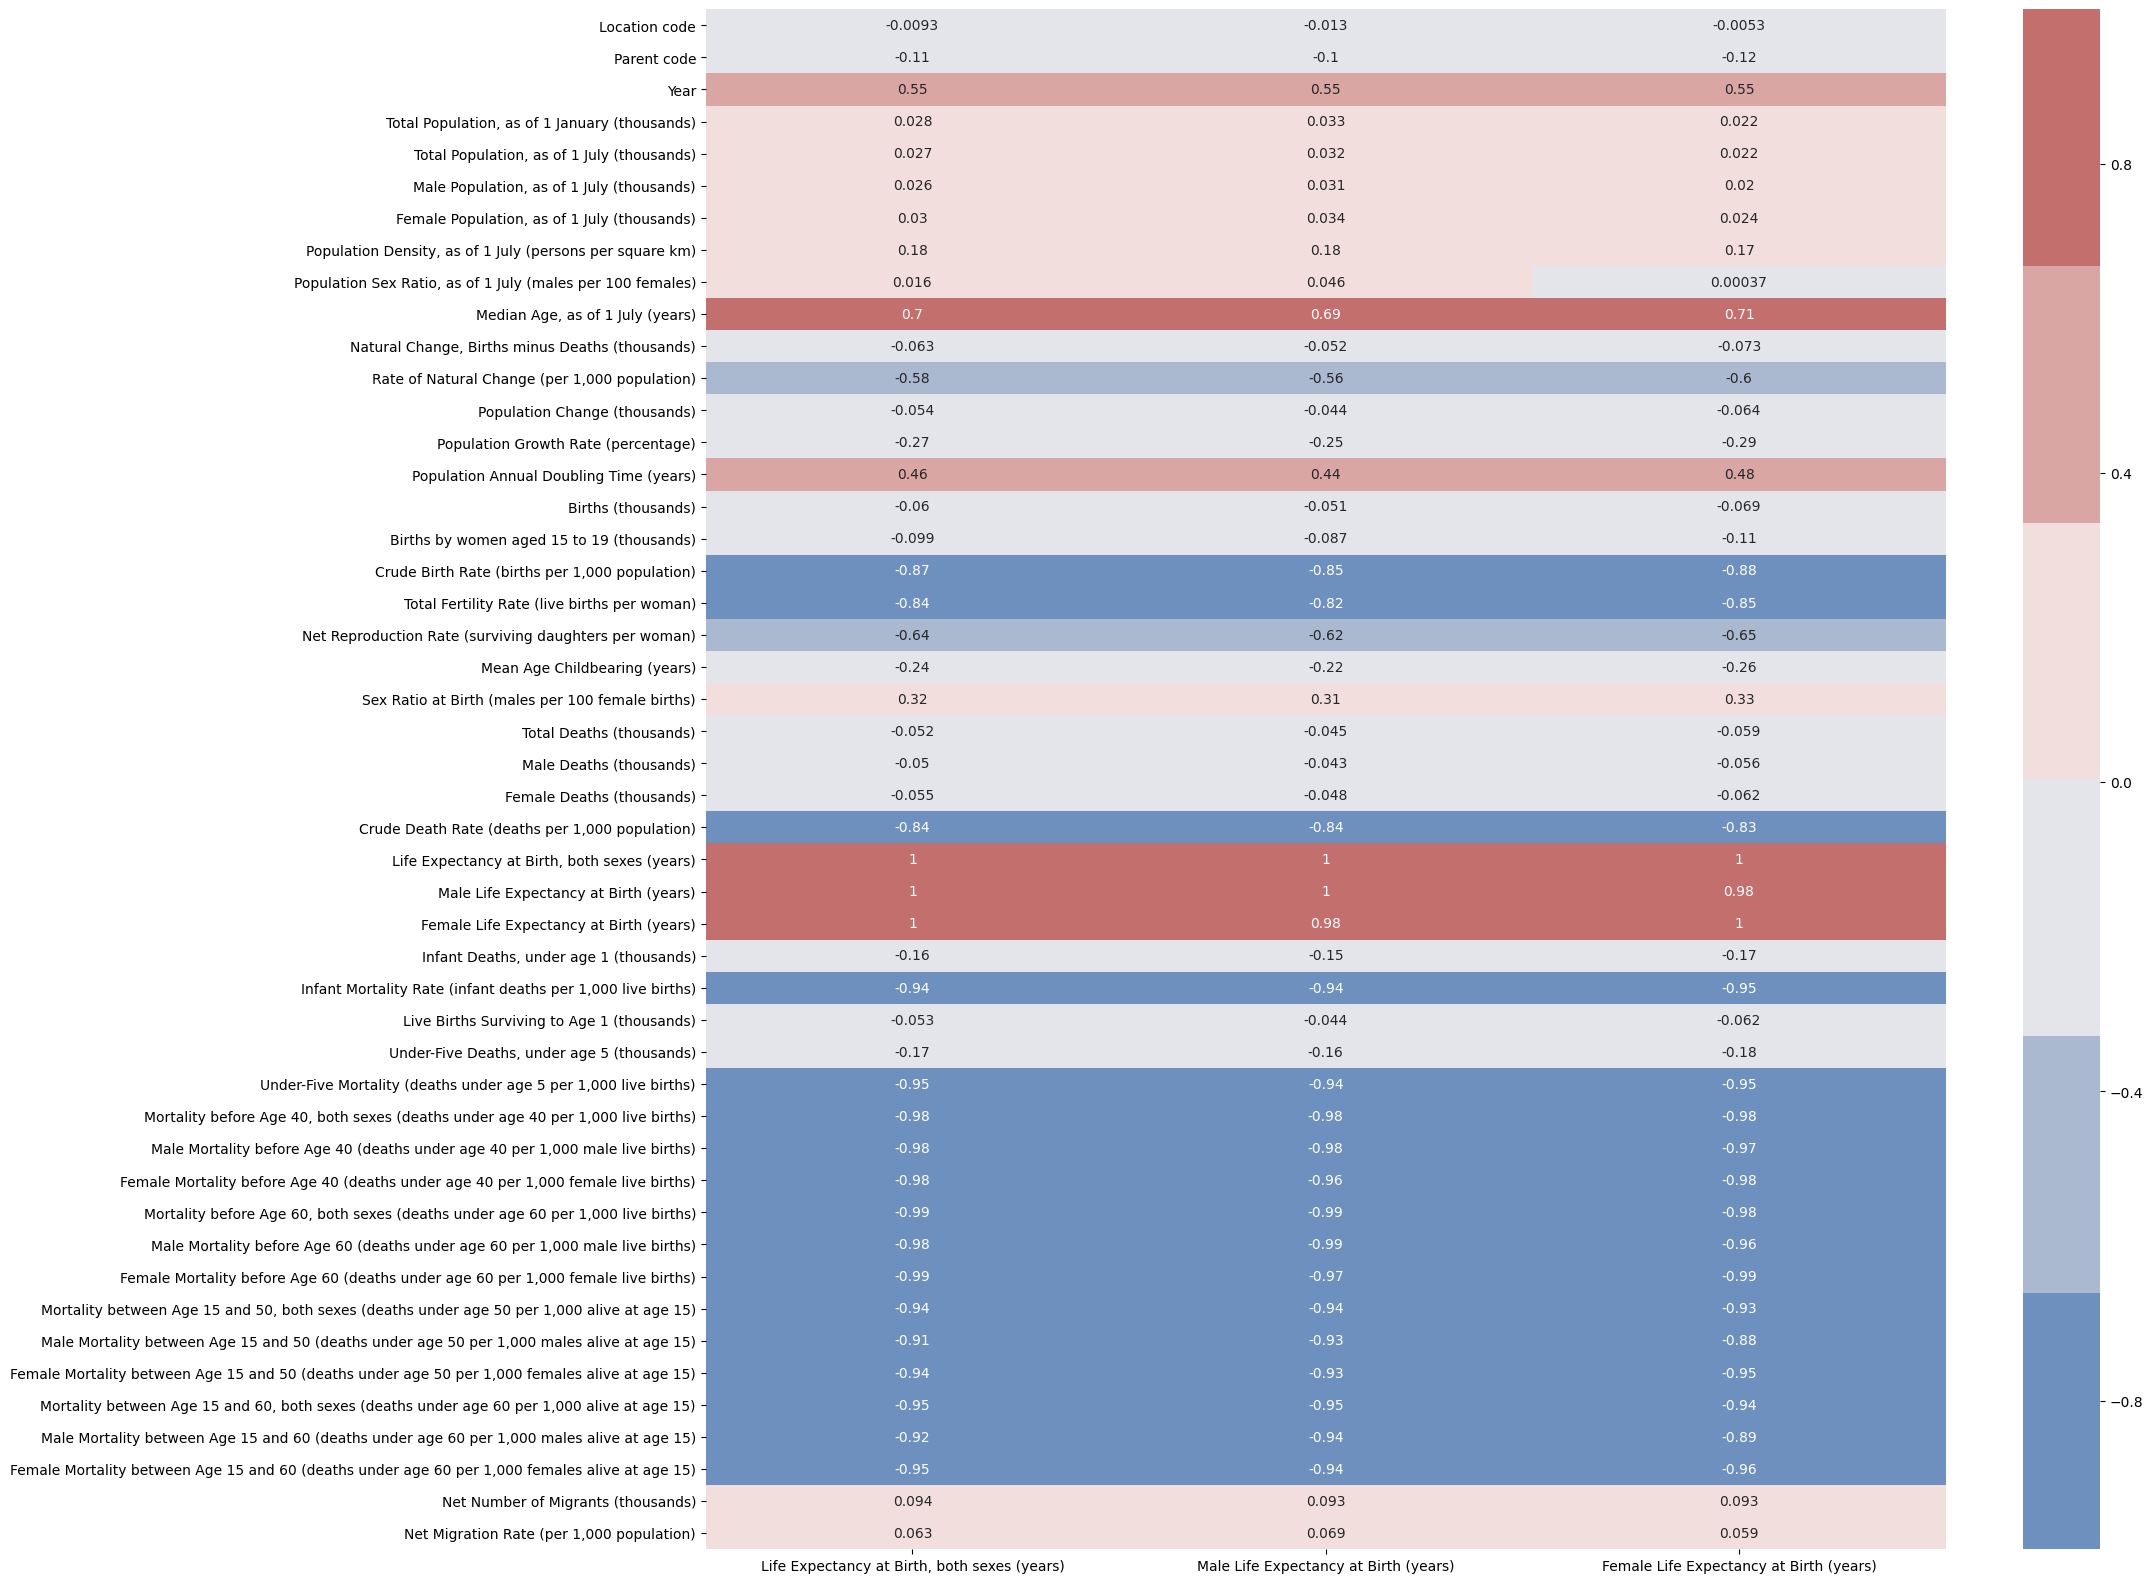

In [117]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(heat_map, cmap= sns.color_palette("vlag"), annot=True)
plt.show()

In [118]:
threshold = 0.5
features = heat_map[(heat_map['Life Expectancy at Birth, both sexes (years)'] >= threshold) 
                   | (heat_map['Life Expectancy at Birth, both sexes (years)'] <= - threshold)]
features.drop(['Male Life Expectancy at Birth (years)',
                        'Female Life Expectancy at Birth (years)',
                          'Life Expectancy at Birth, both sexes (years)'], inplace = True)

In [119]:
features = features.index
len(features)

21

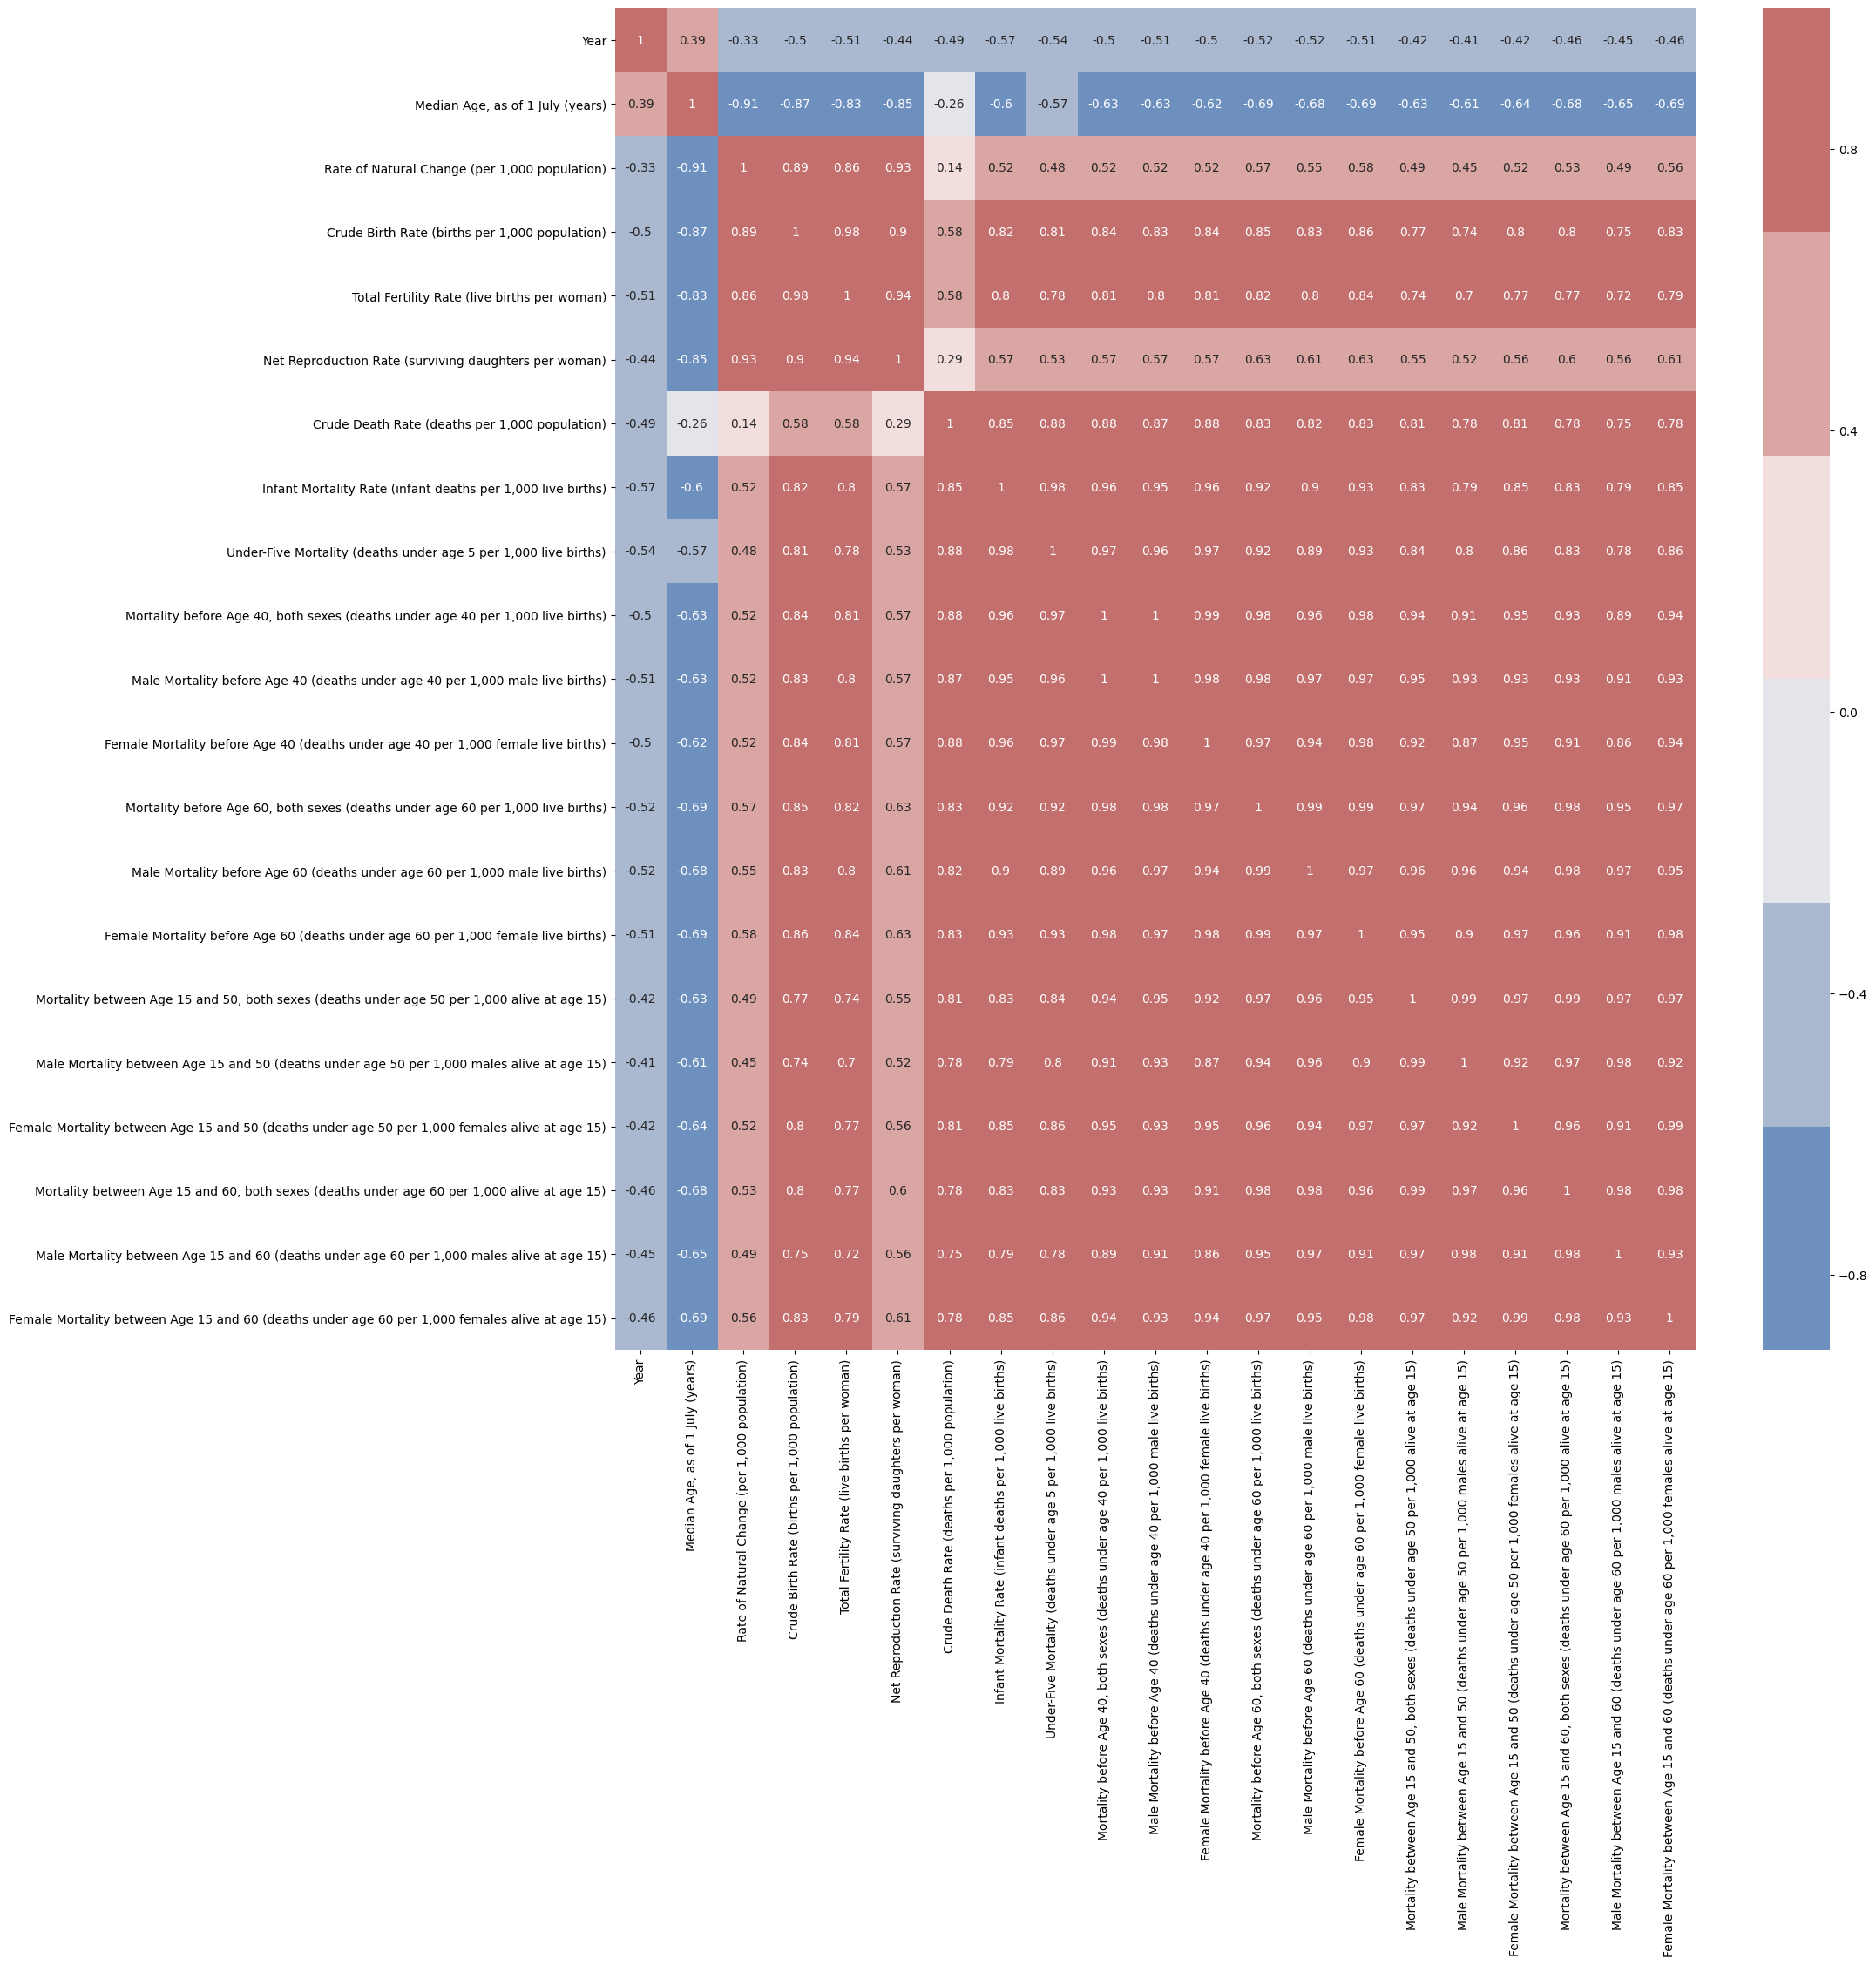

In [120]:
heat_map_x = df[features].corr()
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(heat_map_x, cmap= sns.color_palette("vlag"), annot=True)
plt.show()

In [19]:
# features = features.drop([
#        'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)',
#        'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
# #        'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
#        'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)',
#        'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)',
# #        'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
#        'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)',
#        'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)',
# #        'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)',
#        'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
#        'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)'
    
# ])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df[features.drop('Year')],df[df.columns[26:29]])
reg = KNeighborsRegressor(n_neighbors=2 ,p = 1)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [123]:
y_hat = reg.predict(X_test)
for i in range (3):
    print(f'R2 for Evaluation {y_test.columns[i]}: {r2_score(y_test[y_test.columns[i]],y_hat[ :,i])}')

R2 for Evaluation Life Expectancy at Birth, both sexes (years): 0.9987331951536402
R2 for Evaluation Male Life Expectancy at Birth (years): 0.998612623759318
R2 for Evaluation Female Life Expectancy at Birth (years): 0.9978567137144301


In [124]:
X_2022 = df_test[features.drop('Year')]
y_2022 = df_test[y_test.columns]

In [125]:
for i in X_2022.columns:
    print(i)
    print(X_2022[X_2022[i] == '...'].index)
for i in y_2022.columns:
    print(i)
    print(y_2022[y_2022[i] == '...'].index)

Median Age, as of 1 July (years)
Int64Index([10981], dtype='int64')
Rate of Natural Change (per 1,000 population)
Int64Index([10981], dtype='int64')
Crude Birth Rate (births per 1,000 population)
Int64Index([10981], dtype='int64')
Total Fertility Rate (live births per woman)
Int64Index([10981], dtype='int64')
Net Reproduction Rate (surviving daughters per woman)
Int64Index([10981], dtype='int64')
Crude Death Rate (deaths per 1,000 population)
Int64Index([10981], dtype='int64')
Infant Mortality Rate (infant deaths per 1,000 live births)
Int64Index([10981], dtype='int64')
Under-Five Mortality (deaths under age 5 per 1,000 live births)
Int64Index([10981], dtype='int64')
Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)
Int64Index([10981], dtype='int64')
Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)
Int64Index([10981], dtype='int64')
Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)
Int64Index([10

In [126]:
X_2022.drop([10981],inplace = True)
y_2022.drop([10981],inplace = True)
df_test.drop([10981],inplace = True)

In [127]:
df_test['Location code']

0        108
79       174
158      262
237      232
316      231
        ... 
18328    882
18407    772
18486    776
18565    798
18644    876
Name: Location code, Length: 236, dtype: int64

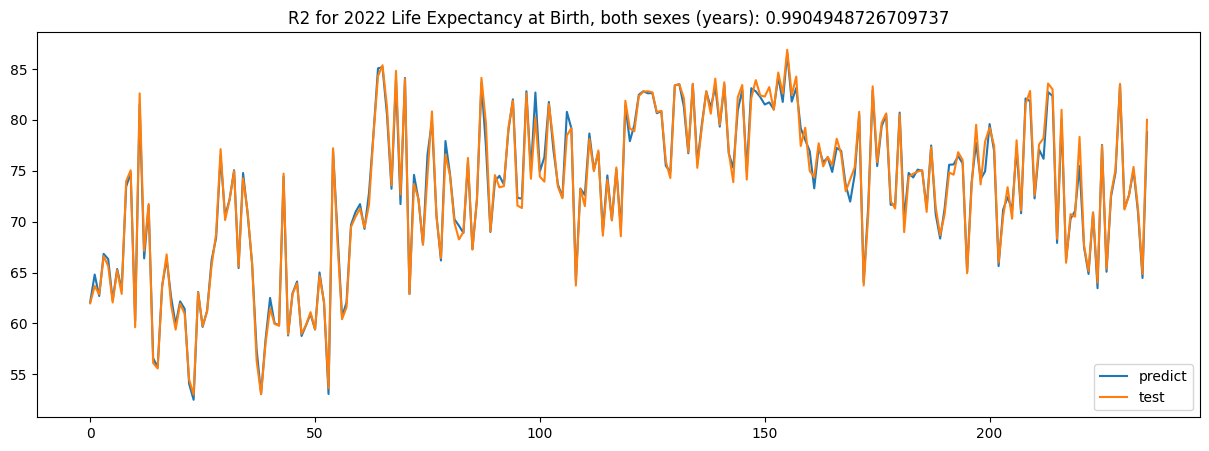

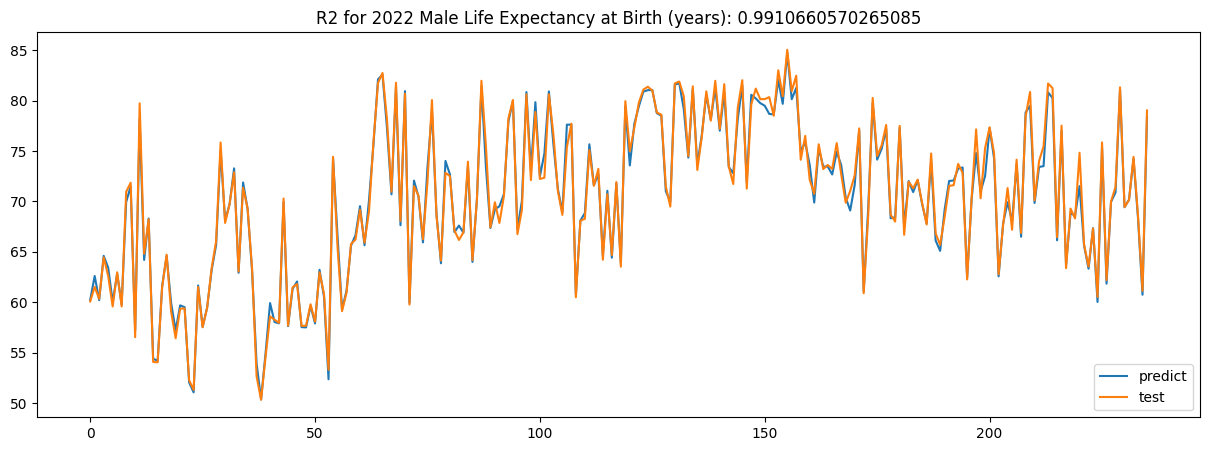

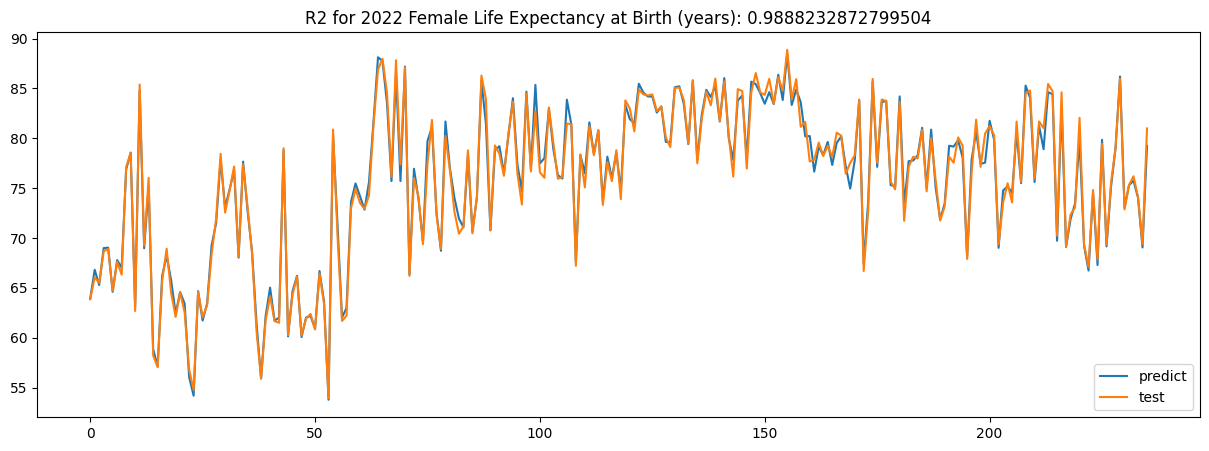

In [128]:
y_hat = reg.predict(X_2022)
for i in range (3):
    y = np.array(y_2022[y_2022.columns[i]].astype('float'))
    plt.figure(figsize=(15,5))
    plt.plot(np.transpose(y_hat)[i])
    plt.plot(y)
    plt.title(f'R2 for 2022 {y_2022.columns[i]}: {r2_score(y,y_hat[ :,i])}')
    plt.legend(['predict', 'test'], loc='lower right')
    plt.show()

In [129]:
y_hat[df_test['Region, subregion, country or area *'] == 'Zimbabwe']

array([[59.8915, 57.2025, 62.4305]])

In [130]:
y_2022[df_test['Region, subregion, country or area *'] == 'Zimbabwe']

,"Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years)
1501,59.391,56.428,62.094


In [131]:
save_path = './Result/Baseline(no added Feature)'
file_name = 'y_hat'
np.save(f'{save_path}/{file_name}',y_hat)
file_name = 'y_2022'
y_2022.to_csv(f'{save_path}/{file_name}.csv')
file_name = 'X_2022'
X_2022.to_csv(f'{save_path}/{file_name}.csv')